In [183]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [184]:
def load_tab_separated_data(filepath):
    with open(filepath, 'r') as f:
        data = [line.strip().split('\t') for line in f if line.strip()]
    data = np.array(data, dtype=float)
    return data

# Ejemplo de uso:
# data = load_tab_separated_data(gyration_file)

In [ ]:
#creo que podria automatizar esto, por ahora tengo pocos datos    

carpeta = "/home/tobias/resultados2/resultados"
ionizacion_grade = "N_beads40/Alpha_n0.2"

gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")
energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")


gyration_dat = load_tab_separated_data(gyration_file)
density_dat = load_tab_separated_data(density_file)
energy_dat = load_tab_separated_data(energy_file)

Beads=[10,20,40]
ionizacion=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]


In [ ]:
#eje x en density_names[-1] #me importan nomas 1,2,3,5
Density_names = [
    "Cationes",
    "Microion Profile anions",
    "Polymero",
    "Cation Profile",
    "Anion(parte del microgel)",
    "Microgel",
    "r"
]

#eje x en energy_names[0]
energy_names = [
    "tiempo",
    "Total",
    "Cinetica",
    "Bonded",
    "Non-bonded",
    "Coulombina"
]     

line_styles = ["", "--", "-", ":", (0, (3, 1, 1, 1)), (0, (5, 10)), (0, (1, 10))]
mark_styles = ['o', 's', '^', 'D', 'v', 'P', '*']
rainbow_colors = [
    "#50FFFF",  # rojo
    "#3cb44b",  # verde
    "#ff0000",  # amarillo
    "#4363d8",  # azul
    "#f58231",  # naranja
    "#0011ff",  # violeta
    "#46f0f0",  # cian
    "#34a4ff",  # rosa
    "#bcf60c",  # lima
    "#fabebe",  # rosa claro
    "#008080",  # teal
    "#e6beff",  # lila claro
]

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3853/2130235917.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel("r [$\sigma$]", fontsize=16)


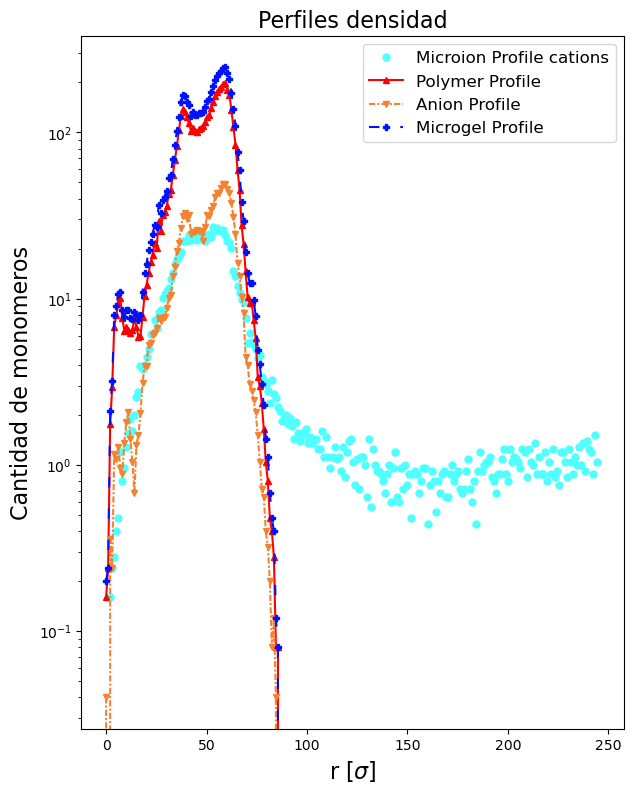

In [197]:
#grafico density profiles

plt.figure(figsize=(7, 9))
for i in [0, 2, 4, 5]:
    plt.plot(density_dat[:, 6], density_dat[:, i], label=Density_names[i],
             linestyle=line_styles[i], marker=mark_styles[i],
             markersize=5, color=rainbow_colors[i])
plt.title("Perfiles densidad", fontsize=16)
plt.legend(fontsize=12)
plt.yscale("log")
#plt.xscale("log")
plt.xlabel("r [$\sigma$]", fontsize=16)
plt.ylabel("Cantidad de monomeros", fontsize=16)   #creo que es el numero de particulas por unidad de volumen, #normalizar

plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_3853/2622760519.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("Energía [$\epsilon$]", fontsize=16)


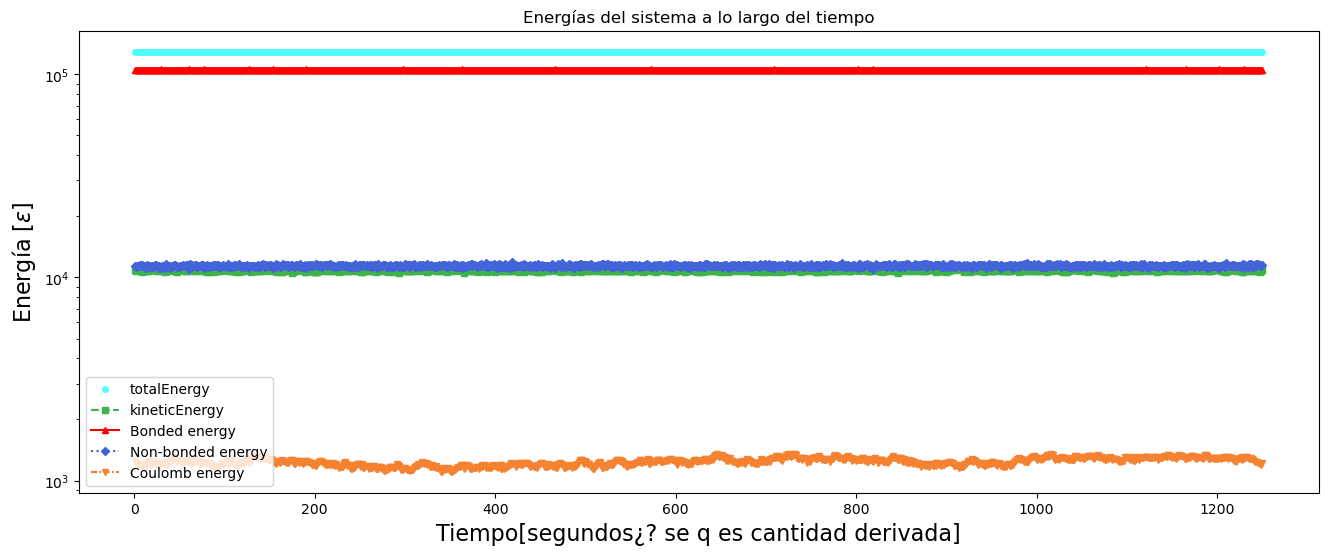

In [189]:
#grafico energias

energy_dat = load_tab_separated_data(energy_file)

plt.figure(figsize=(16, 6))
for i in range(1, 6):
    plt.plot(energy_dat[:, 0], energy_dat[:, i], label=energy_names[i], linestyle=line_styles[i-1], marker=mark_styles[i-1], markersize=4, color=rainbow_colors[i-1])
plt.xlabel("Tiempo[segundos¿? se q es cantidad derivada]", fontsize=16)
plt.ylabel("Energía [$\epsilon$]", fontsize=16)
#plt.ylim(35000,40000)
#plt.ylim(1000,2000)
plt.yscale("log")
#plt.xscale("log")
plt.title("Energías del sistema a lo largo del tiempo")
plt.legend()

Valor ajustado: 2582.8 ± 0.1
sumar todos y dividir por total 2583.2


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3853/188458007.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('R_g [$\sigma$]', fontsize=16)


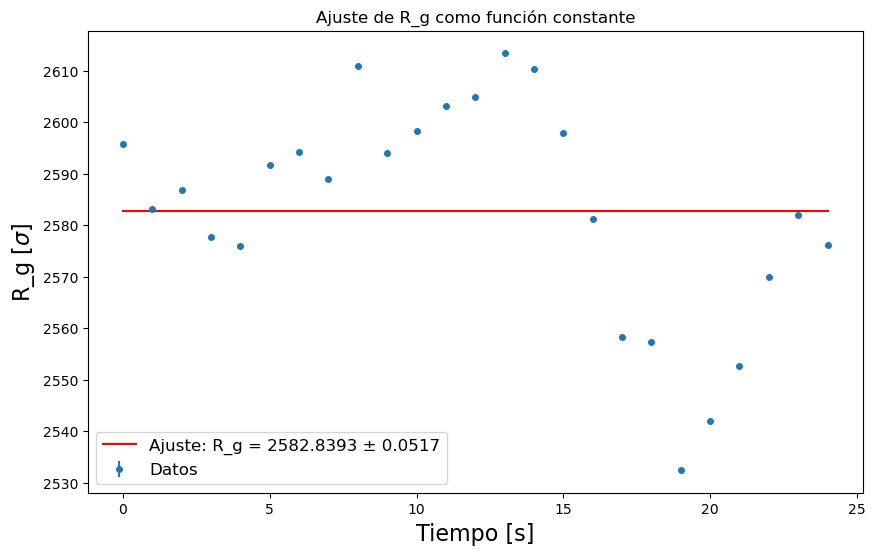

In [190]:
from scipy.optimize import curve_fit

# Definimos la función constante, para que sea "R_g"
def constante(x, a):
    return a * np.ones_like(x)


y = gyration_dat[:, 0]  # eje x (R_g)²
y_err =0.0001*y
x = np.arange(len(y))  # eje y (indices, digamos que seria "t")

# Ajuste
popt, pcov = curve_fit(constante, x, y, sigma=y_err, absolute_sigma=True)
a_fit = popt[0]
a_err = np.sqrt(pcov[0, 0])

print(f"Valor ajustado: {a_fit:.1f} ± {a_err:.1f}")
print(f"sumar todos y dividir por total {sum(gyration_dat[:,0])/25:.1f}")
plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='Datos', markersize=4)
plt.plot(x, constante(x, *popt), 'r-', label=f'Ajuste: R_g = {a_fit:.4f} ± {a_err:.4f}')
plt.xlabel('Tiempo [s]', fontsize=16)
plt.ylabel('R_g [$\sigma$]', fontsize=16)
plt.title('Ajuste de R_g como función constante')
plt.legend(fontsize=12)
plt.show()


In [ ]:
#rg/rgo vs ion                          listo
#a/ao vs ion                            como caluculo a
#Rg vs n                                listo
#carga neta vs ion                      como calculo la carga neta
#asphericity vs ion #Lz²-1/2(Lx²+Ly²)   listo                           gyration_dat[;,1]
#acillindrity vs ion #Ly²-Lx²           listo                           gyration_dat[;,2]

In [ ]:

carpeta = "/home/tobias/resultados2/resultados"
for i in ionizacion:
    ionizacion_grade = "N_beads20/Alpha_n0.{i}"
    gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
    density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")
    energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")


    gyration_dat = load_tab_separated_data(gyration_file)
    density_dat = load_tab_separated_data(density_file)
    energy_dat = load_tab_separated_data(energy_file)


    Rg_vs_ionº=[]
    m=int((i*10))
    Rg_vs_ionº[m]=sum(gyration_dat[:,0])/25

plt.plot(ionizacion,Rg_vs_ionº)
plt.xlabel('Ionización')
plt.ylabel('Rg')
plt.title('Rg vs Ionización')
plt.show()




FileNotFoundError: [Errno 2] No such file or directory: '/home/tobias/resultados2/resultados/N_beads20/Alpha_n0.{i}/gyration_tensor.dat'

In [ ]:
for j in ionizacion: #para cada ionizacion hacemos un plot del Rg vs beads
    for i in Beads:
        ionizacion_grade = "N_beads{i}/Alpha_n0.{j}"
        gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
        density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")
        energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")


        gyration_dat = load_tab_separated_data(gyration_file)
        density_dat = load_tab_separated_data(density_file)
        energy_dat = load_tab_separated_data(energy_file)
        Rg_vs_Beadsº=[]
        m=int((i/10)-1)
        Rg_vs_Beadsº[m]=sum(gyration_dat[:,0])/25
    plt.plot(Beads,Rg_vs_Beadsº)
    plt.xlabel('Cantidad de beads')
    plt.ylabel('Rg')
    plt.title('Rg vs Cantidad de beads')
    plt.show()
    #plt.savefig(f'Rg_vs_Beads_ion{j}.png') hay q guardar despues cuando veamos q esta todo ok

In [ ]:
#para cara Beads  vamos a graficar la asphericity y acillindrity vs ionizacion
for i in Beads:
    for j in ionizacion:
        ionizacion_grade = "N_beads{i}/Alpha_n0.{j}"
        gyration_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "gyration_tensor.dat")
        density_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "averaged_profiles.txt")
        energy_file = os.path.join(carpeta, ionizacion_grade.strip('/'), "energies.dat")


        gyration_dat = load_tab_separated_data(gyration_file)
        density_dat = load_tab_separated_data(density_file)
        energy_dat = load_tab_separated_data(energy_file)
        asphericity_vs_ionº=[]
        acillindrity_vs_ionº=[]
        m=int((j*10))
        asphericity_vs_ionº[m]=sum(gyration_dat[:,1])/25
        acillindrity_vs_ionº[m]=sum(gyration_dat[:,2])/25
    plt.plot(ionizacion,asphericity_vs_ionº)
    plt.xlabel('Ionización')
    plt.ylabel('Asphericity')
    plt.title('Asphericity vs Ionización')
    plt.show()
    #plt.savefig(f'Asphericity_vs_ion_Beads{i}.png') hay q guardar despues cuando veamos q esta todo ok
    plt.plot(ionizacion,acillindrity_vs_ionº)
    plt.xlabel('Ionización')
    plt.ylabel('Acillindrity')
    plt.title('Acillindrity vs Ionización')
    plt.show()
    #plt.savefig(f'Acillindrity_vs_ion_Beads{i}.png') hay q guardar despues cuando veamos q esta todo ok